In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os

### 1. Show 15 examples of each datset (5 from start, 5 from middle, and 5 from end).
Here we can see that test and test2 datasets include symbols not present in the train dataset (with reversed color - white backgroung with black symbol) and test2 dataset doesn't represent train dataset at all, but has the similar symbols as in the test dataset.

Images with label 1:


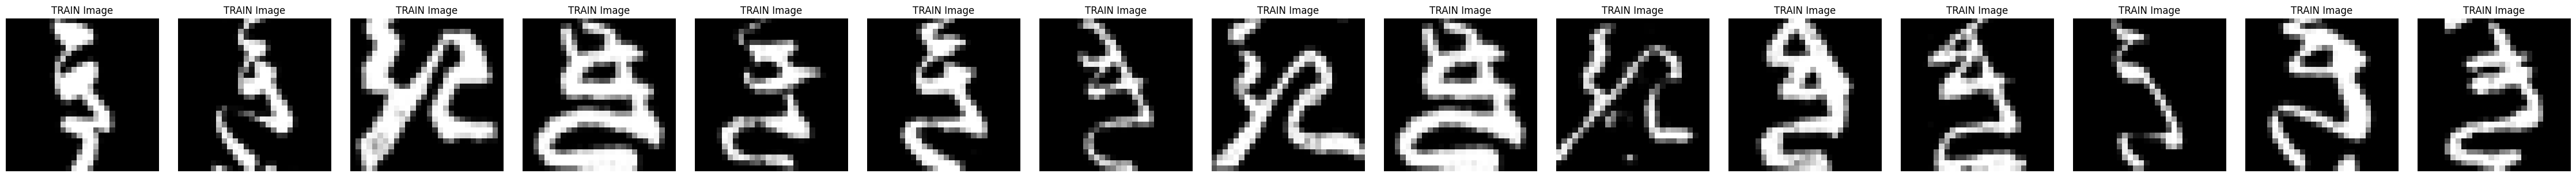

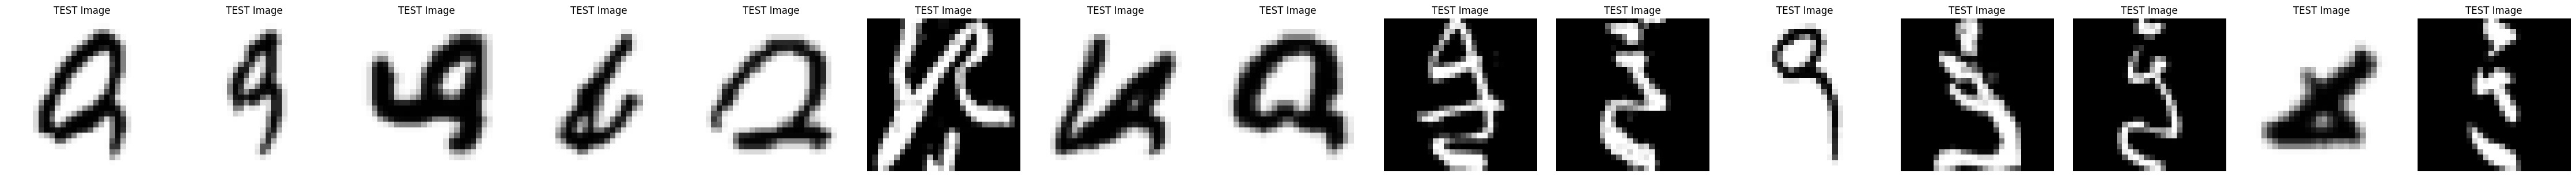

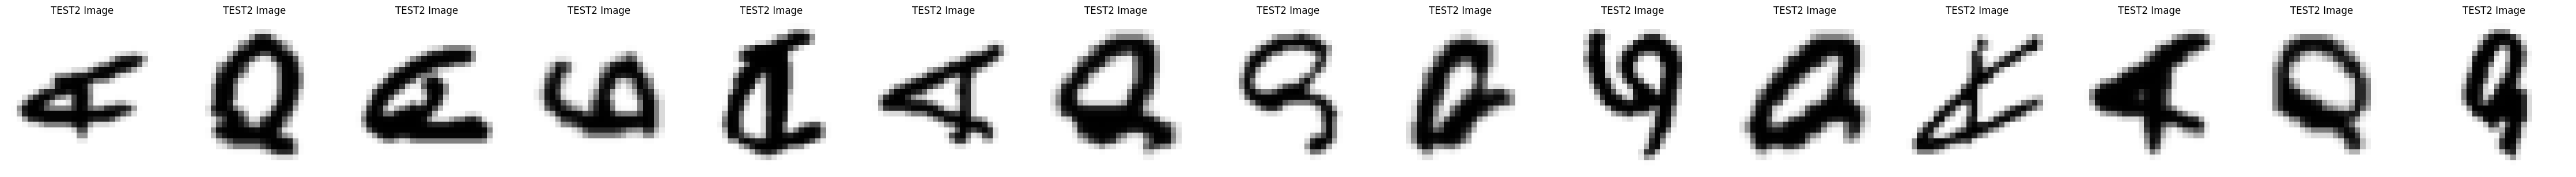

Images with label 2:


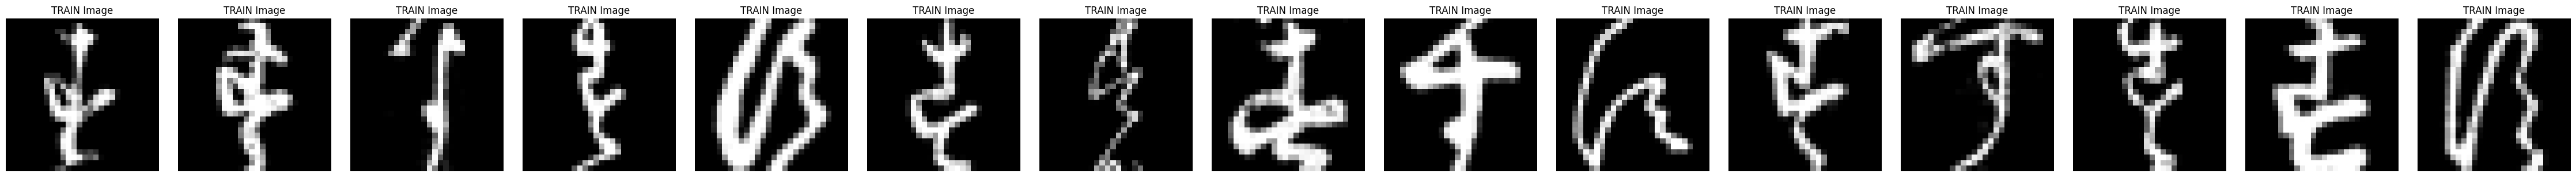

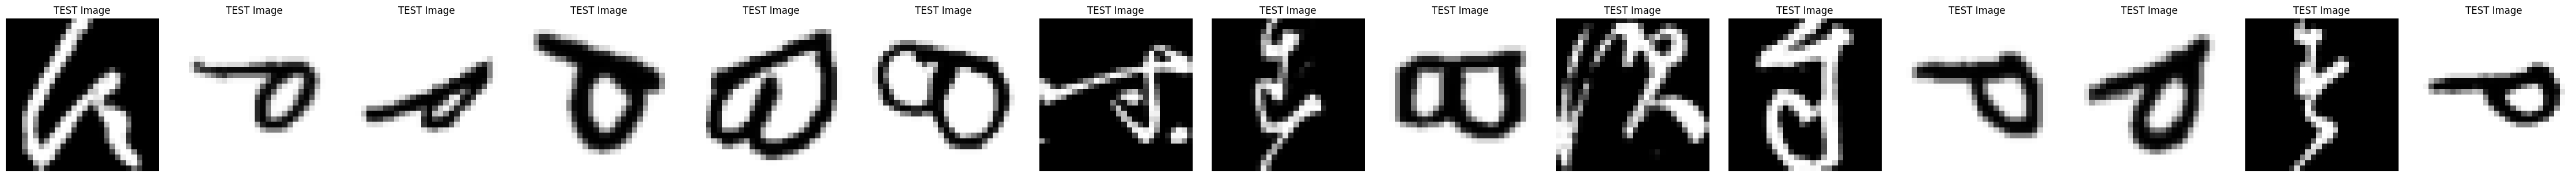

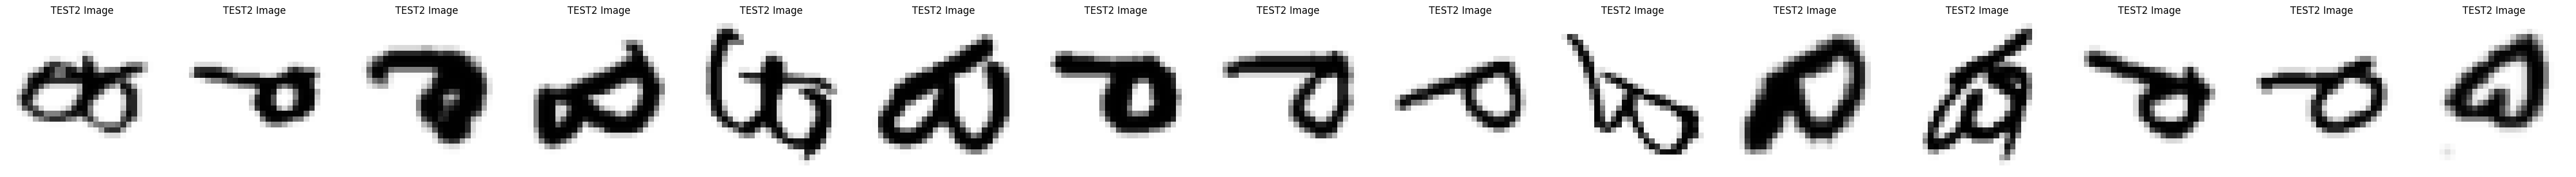

Images with label 3:


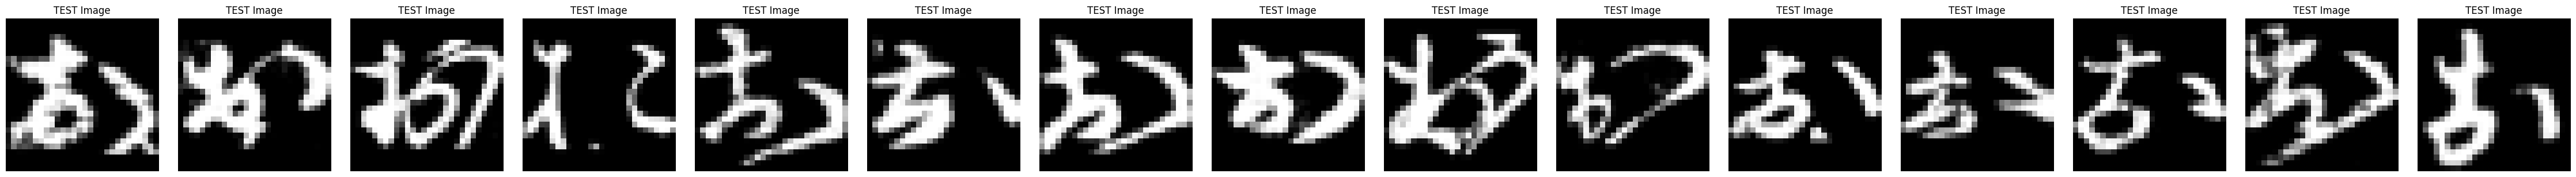

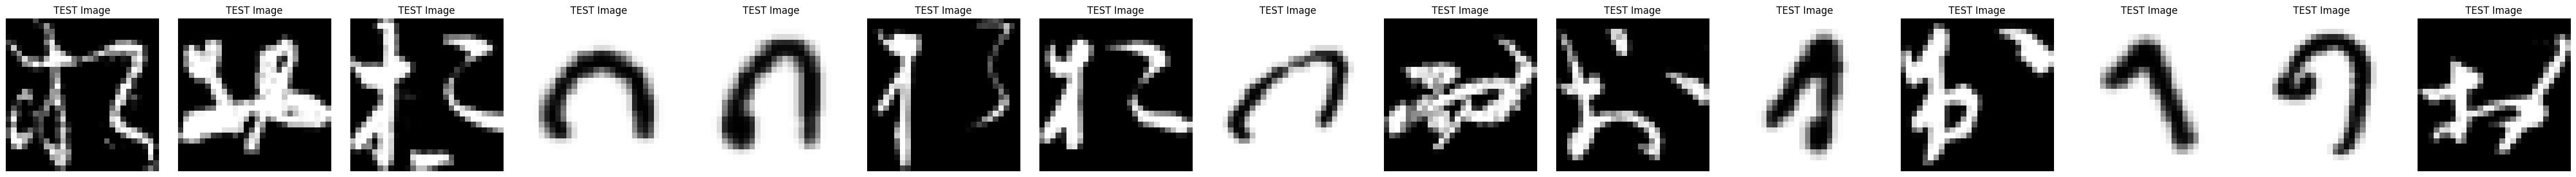

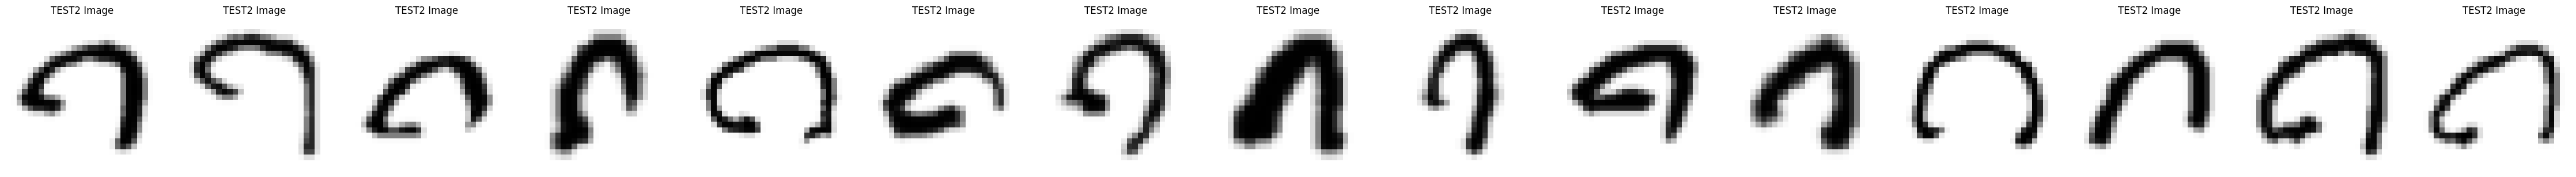

Images with label 4:


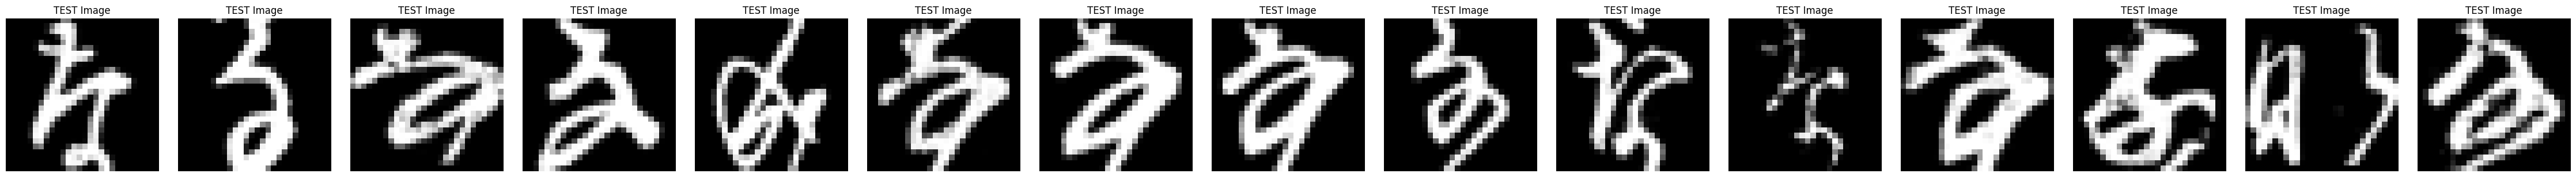

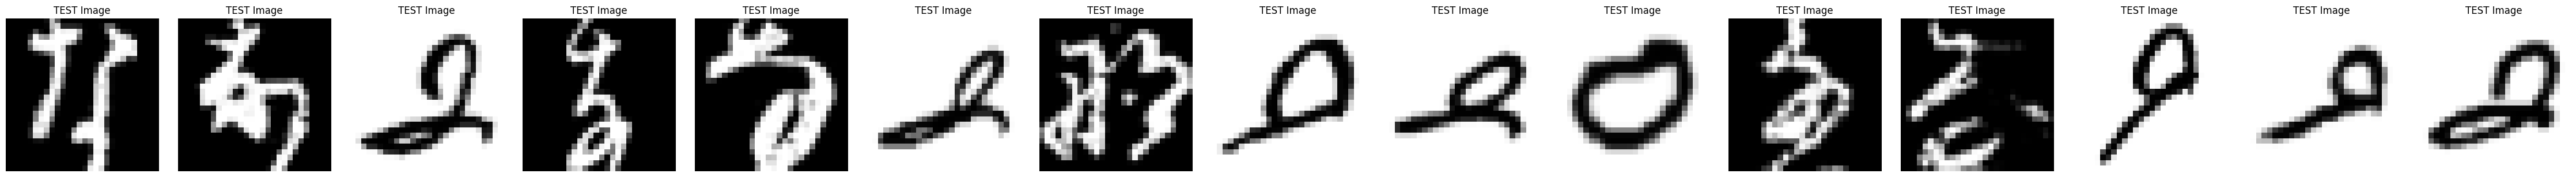

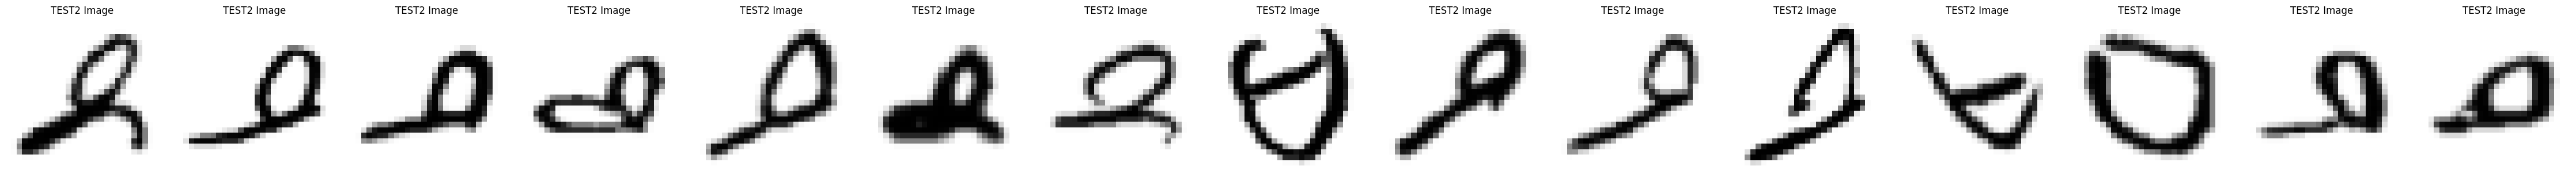

Images with label 5:


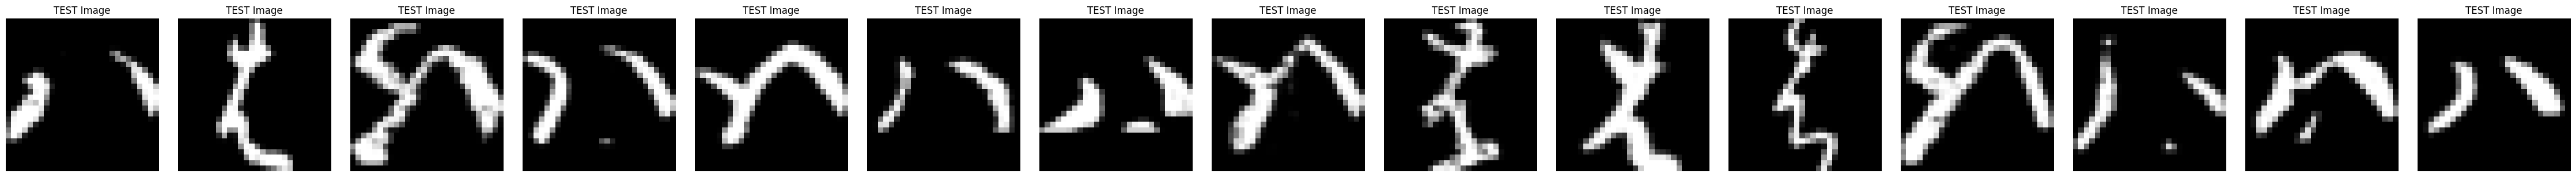

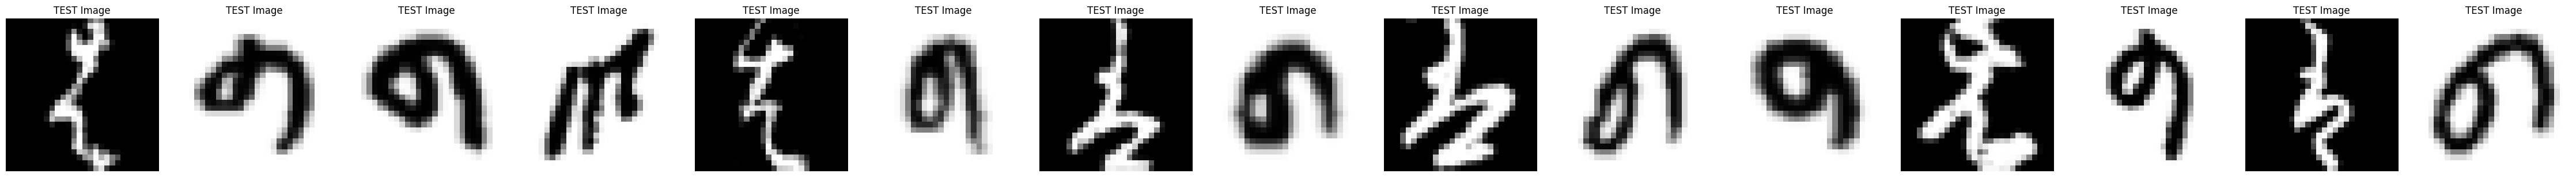

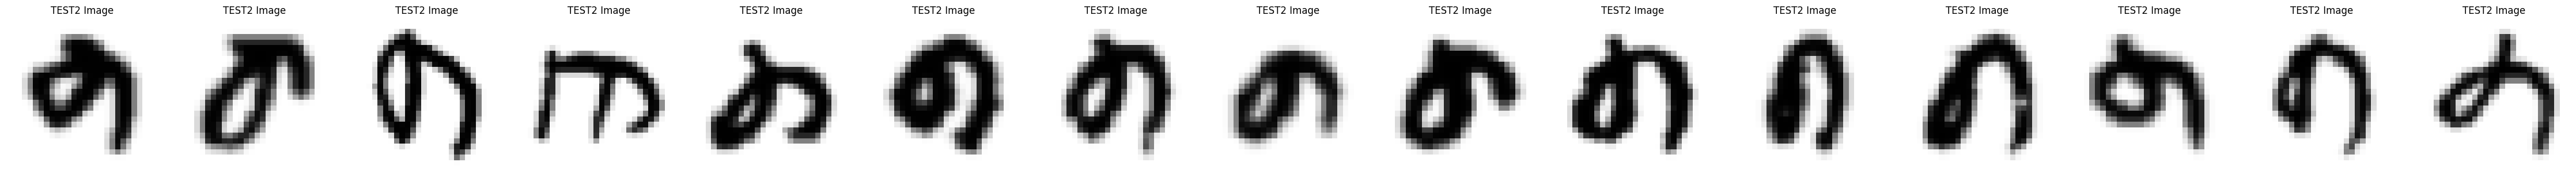

Images with label 6:


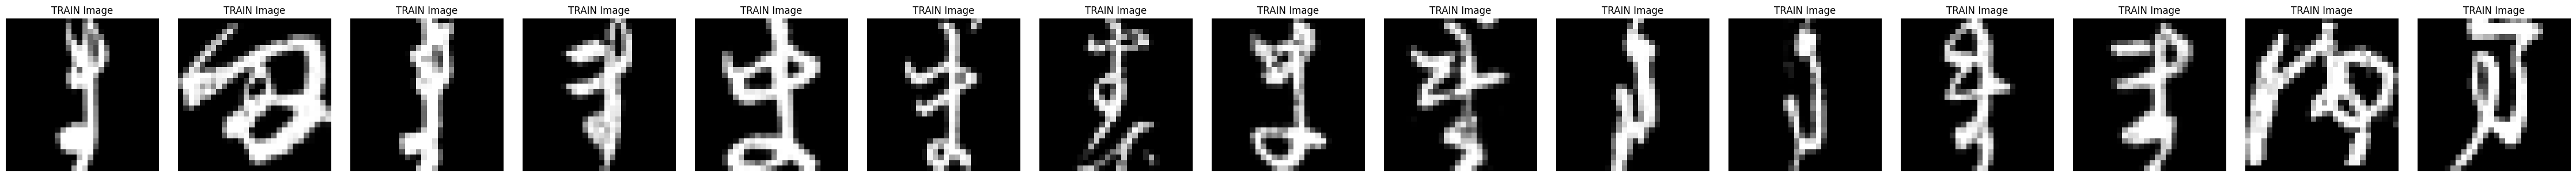

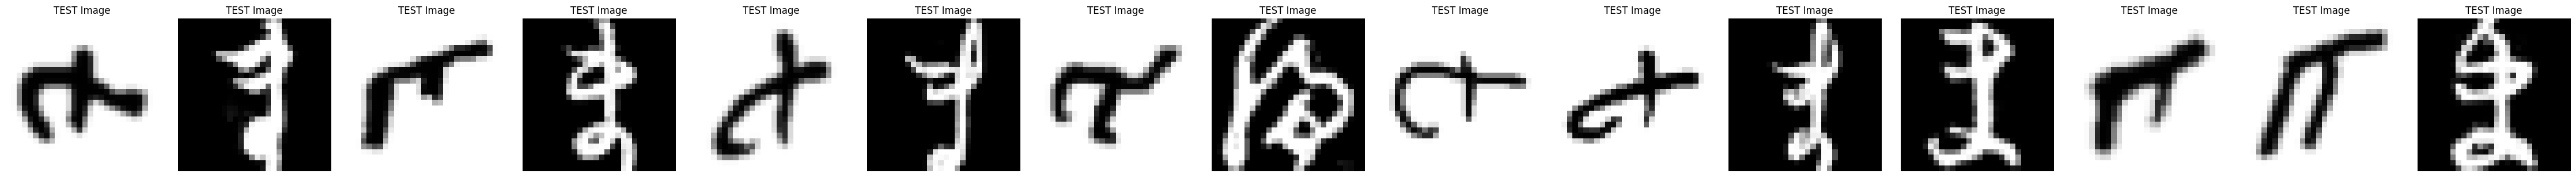

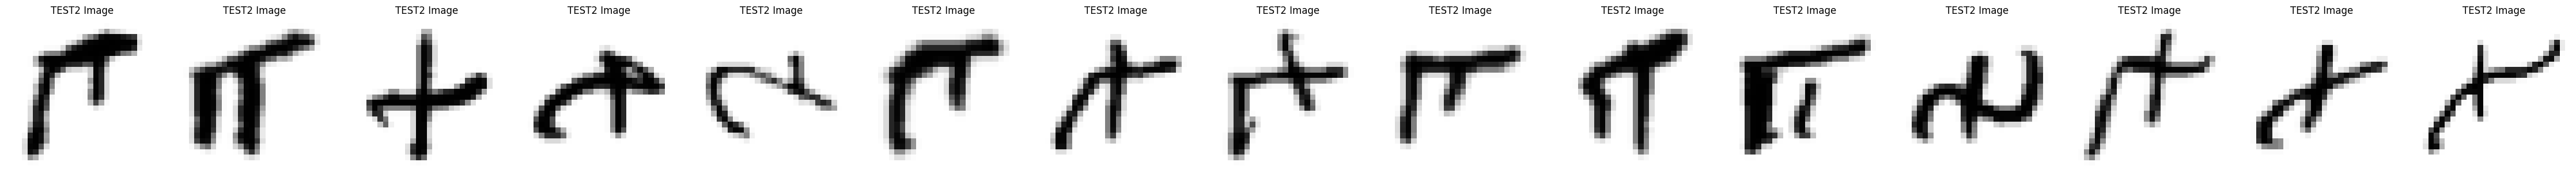

In [24]:
def show_image(image_paths, image_type):
    # Create a figure with the required number of columns
    fig, axes = plt.subplots(1, len(image_paths), figsize=(len(image_paths) * 3, 3))
    
    # Load and display each image
    for ax, image_path in zip(axes, image_paths):
        img = np.load(image_path)
        # print(f"Image shape: {img.shape}")

        img = img[0]  # Convert to (H, W) for display
        
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        ax.set_title(f"{image_type} Image")
    
    # Show the final result
    plt.tight_layout()
    plt.show()

print("Images with label 1:")
train_image_paths = ["./TRAIN/1/train_img_0.npy", "./TRAIN/1/train_img_1.npy", "./TRAIN/1/train_img_2.npy", "./TRAIN/1/train_img_3.npy", "./TRAIN/1/train_img_4.npy", "./TRAIN/1/train_img_3000.npy", "./TRAIN/1/train_img_3001.npy", "./TRAIN/1/train_img_3002.npy", "./TRAIN/1/train_img_3.npy", "./TRAIN/1/train_img_3004.npy",  "./TRAIN/1/train_img_599.npy", "./TRAIN/1/train_img_5996.npy", "./TRAIN/1/train_img_5997.npy", "./TRAIN/1/train_img_5998.npy", "./TRAIN/1/train_img_5999.npy"] 
show_image(train_image_paths, "TRAIN")
test_image_paths1 = ["./TEST/1/tst_img_0.npy", "./TEST/1/tst_img_1.npy",  "./TEST/1/tst_img_2.npy", "./TEST/1/tst_img_3.npy", "./TEST/1/tst_img_4.npy",  "./TEST/1/tst_img_500.npy", "./TEST/1/tst_img_501.npy",  "./TEST/1/tst_img_502.npy", "./TEST/1/tst_img_503.npy", "./TEST/1/tst_img_504.npy", "./TEST/1/tst_img_995.npy", "./TEST/1/tst_img_996.npy", "./TEST/1/tst_img_997.npy", "./TEST/1/tst_img_998.npy", "./TEST/1/tst_img_999.npy"]
show_image(test_image_paths1, "TEST")
test2_image_paths1 = ["./TEST2/1/test2_img_0.npy", "./TEST2/1/test2_img_1.npy",  "./TEST2/1/test2_img_2.npy", "./TEST2/1/test2_img_3.npy", "./TEST2/1/test2_img_4.npy",  "./TEST2/1/test2_img_500.npy", "./TEST2/1/test2_img_501.npy",  "./TEST2/1/test2_img_502.npy", "./TEST2/1/test2_img_503.npy", "./TEST2/1/test2_img_504.npy", "./TEST2/1/test2_img_995.npy", "./TEST2/1/test2_img_996.npy", "./TEST2/1/test2_img_997.npy", "./TEST2/1/test2_img_998.npy", "./TEST2/1/test2_img_999.npy"]
show_image(test2_image_paths1, "TEST2")

print("Images with label 2:")
train_image_paths2 = ["./TRAIN/2/train_img_6000.npy", "./TRAIN/2/train_img_6001.npy", "./TRAIN/2/train_img_6002.npy", "./TRAIN/2/train_img_6003.npy", "./TRAIN/2/train_img_6004.npy", "./TRAIN/2/train_img_9000.npy", "./TRAIN/2/train_img_9001.npy", "./TRAIN/2/train_img_9002.npy", "./TRAIN/2/train_img_9003.npy", "./TRAIN/2/train_img_9004.npy", "./TRAIN/2/train_img_11995.npy", "./TRAIN/2/train_img_11996.npy", "./TRAIN/2/train_img_11997.npy", "./TRAIN/2/train_img_11998.npy", "./TRAIN/2/train_img_11999.npy"]
show_image(train_image_paths2, "TRAIN")
test_image_paths2 = ["./TEST/2/tst_img_1000.npy", "./TEST/2/tst_img_1001.npy",  "./TEST/2/tst_img_1002.npy", "./TEST/2/tst_img_1003.npy", "./TEST/2/tst_img_1004.npy",  "./TEST/2/tst_img_1500.npy", "./TEST/2/tst_img_1501.npy", "./TEST/2/tst_img_1502.npy", "./TEST/2/tst_img_1503.npy", "./TEST/2/tst_img_1504.npy", "./TEST/2/tst_img_1995.npy", "./TEST/2/tst_img_1996.npy", "./TEST/2/tst_img_1997.npy", "./TEST/2/tst_img_1998.npy",  "./TEST/2/tst_img_1999.npy"]
show_image(test_image_paths2, "TEST")
test2_image_paths2 = ["./TEST2/2/test2_img_1000.npy", "./TEST2/2/test2_img_1001.npy",  "./TEST2/2/test2_img_1002.npy", "./TEST2/2/test2_img_1003.npy", "./TEST2/2/test2_img_1004.npy",  "./TEST2/2/test2_img_1500.npy", "./TEST2/2/test2_img_1501.npy", "./TEST2/2/test2_img_1502.npy", "./TEST2/2/test2_img_1503.npy", "./TEST2/2/test2_img_1504.npy", "./TEST2/2/test2_img_1995.npy", "./TEST2/2/test2_img_1996.npy", "./TEST2/2/test2_img_1997.npy", "./TEST2/2/test2_img_1998.npy",  "./TEST2/2/test2_img_1999.npy"]
show_image(test2_image_paths2, "TEST2")

print("Images with label 3:")
test_image_paths3 = ["./TRAIN/3/train_img_12000.npy", "./TRAIN/3/train_img_12001.npy", "./TRAIN/3/train_img_12002.npy", "./TRAIN/3/train_img_12003.npy", "./TRAIN/3/train_img_12004.npy", "./TRAIN/3/train_img_15000.npy", "./TRAIN/3/train_img_15001.npy", "./TRAIN/3/train_img_15002.npy", "./TRAIN/3/train_img_15003.npy", "./TRAIN/3/train_img_15004.npy",  "./TRAIN/3/train_img_17995.npy", "./TRAIN/3/train_img_17996.npy", "./TRAIN/3/train_img_17997.npy", "./TRAIN/3/train_img_17998.npy", "./TRAIN/3/train_img_17999.npy"]
show_image(test_image_paths3, "TEST")
test_image_paths3 = ["./TEST/3/tst_img_2000.npy", "./TEST/3/tst_img_2001.npy",  "./TEST/3/tst_img_2002.npy", "./TEST/3/tst_img_2003.npy", "./TEST/3/tst_img_2004.npy",  "./TEST/3/tst_img_2500.npy", "./TEST/3/tst_img_2501.npy", "./TEST/3/tst_img_2502.npy", "./TEST/3/tst_img_2503.npy", "./TEST/3/tst_img_2504.npy", "./TEST/3/tst_img_2995.npy", "./TEST/3/tst_img_2996.npy", "./TEST/3/tst_img_2997.npy", "./TEST/3/tst_img_2998.npy",  "./TEST/3/tst_img_2999.npy"]
show_image(test_image_paths3, "TEST")
test2_image_paths3 = ["./TEST2/3/test2_img_2000.npy", "./TEST2/3/test2_img_2001.npy",  "./TEST2/3/test2_img_2002.npy", "./TEST2/3/test2_img_2003.npy", "./TEST2/3/test2_img_2004.npy",  "./TEST2/3/test2_img_2500.npy", "./TEST2/3/test2_img_2501.npy", "./TEST2/3/test2_img_2502.npy", "./TEST2/3/test2_img_2503.npy", "./TEST2/3/test2_img_2504.npy", "./TEST2/3/test2_img_2995.npy", "./TEST2/3/test2_img_2996.npy", "./TEST2/3/test2_img_2997.npy", "./TEST2/3/test2_img_2998.npy",  "./TEST2/3/test2_img_2999.npy"]
show_image(test2_image_paths3, "TEST2")

print("Images with label 4:")
test_image_paths3 = ["./TRAIN/4/train_img_18000.npy", "./TRAIN/4/train_img_18001.npy", "./TRAIN/4/train_img_18002.npy", "./TRAIN/4/train_img_18003.npy", "./TRAIN/4/train_img_18004.npy", "./TRAIN/4/train_img_21000.npy", "./TRAIN/4/train_img_21001.npy", "./TRAIN/4/train_img_21002.npy", "./TRAIN/4/train_img_21003.npy", "./TRAIN/4/train_img_21004.npy",  "./TRAIN/4/train_img_23995.npy", "./TRAIN/4/train_img_23996.npy", "./TRAIN/4/train_img_23997.npy", "./TRAIN/4/train_img_23998.npy", "./TRAIN/4/train_img_23999.npy"]
show_image(test_image_paths3, "TEST")
test_image_paths4 = ["./TEST/4/tst_img_3000.npy", "./TEST/4/tst_img_3001.npy",  "./TEST/4/tst_img_3002.npy", "./TEST/4/tst_img_3003.npy", "./TEST/4/tst_img_3004.npy",  "./TEST/4/tst_img_3500.npy", "./TEST/4/tst_img_3501.npy", "./TEST/4/tst_img_3502.npy", "./TEST/4/tst_img_3503.npy", "./TEST/4/tst_img_3504.npy", "./TEST/4/tst_img_3995.npy", "./TEST/4/tst_img_3996.npy", "./TEST/4/tst_img_3997.npy", "./TEST/4/tst_img_3998.npy",  "./TEST/4/tst_img_3999.npy"]
show_image(test_image_paths4, "TEST")
test2_image_paths4 = ["./TEST2/4/test2_img_3000.npy", "./TEST2/4/test2_img_3001.npy",  "./TEST2/4/test2_img_3002.npy", "./TEST2/4/test2_img_3003.npy", "./TEST2/4/test2_img_3004.npy",  "./TEST2/4/test2_img_3500.npy", "./TEST2/4/test2_img_3501.npy", "./TEST2/4/test2_img_3502.npy", "./TEST2/4/test2_img_3503.npy", "./TEST2/4/test2_img_3504.npy", "./TEST2/4/test2_img_3995.npy", "./TEST2/4/test2_img_3996.npy", "./TEST2/4/test2_img_3997.npy", "./TEST2/4/test2_img_3998.npy",  "./TEST2/4/test2_img_3999.npy"]
show_image(test2_image_paths4, "TEST2")

print("Images with label 5:")
test_image_paths5 = ["./TRAIN/5/train_img_24000.npy", "./TRAIN/5/train_img_24001.npy", "./TRAIN/5/train_img_24002.npy", "./TRAIN/5/train_img_24003.npy", "./TRAIN/5/train_img_24004.npy", "./TRAIN/5/train_img_27000.npy", "./TRAIN/5/train_img_27001.npy", "./TRAIN/5/train_img_27002.npy", "./TRAIN/5/train_img_27003.npy", "./TRAIN/5/train_img_27004.npy",  "./TRAIN/5/train_img_29995.npy", "./TRAIN/5/train_img_29996.npy", "./TRAIN/5/train_img_29997.npy", "./TRAIN/5/train_img_29998.npy", "./TRAIN/5/train_img_29999.npy"]
show_image(test_image_paths5, "TEST")
test_image_paths5 = ["./TEST/5/tst_img_4000.npy", "./TEST/5/tst_img_4001.npy",  "./TEST/5/tst_img_4002.npy", "./TEST/5/tst_img_4003.npy", "./TEST/5/tst_img_4004.npy",  "./TEST/5/tst_img_4500.npy", "./TEST/5/tst_img_4501.npy", "./TEST/5/tst_img_4502.npy", "./TEST/5/tst_img_4503.npy", "./TEST/5/tst_img_4504.npy", "./TEST/5/tst_img_4995.npy", "./TEST/5/tst_img_4996.npy", "./TEST/5/tst_img_4997.npy", "./TEST/5/tst_img_4998.npy",  "./TEST/5/tst_img_4999.npy"]
show_image(test_image_paths5, "TEST")
test2_image_paths5 = ["./TEST2/5/test2_img_4000.npy", "./TEST2/5/test2_img_4001.npy",  "./TEST2/5/test2_img_4002.npy", "./TEST2/5/test2_img_4003.npy", "./TEST2/5/test2_img_4004.npy",  "./TEST2/5/test2_img_4500.npy", "./TEST2/5/test2_img_4501.npy", "./TEST2/5/test2_img_4502.npy", "./TEST2/5/test2_img_4503.npy", "./TEST2/5/test2_img_4504.npy", "./TEST2/5/test2_img_4995.npy", "./TEST2/5/test2_img_4996.npy", "./TEST2/5/test2_img_4997.npy", "./TEST2/5/test2_img_4998.npy",  "./TEST2/5/test2_img_4999.npy"]
show_image(test2_image_paths5, "TEST2")

print("Images with label 6:")
train_image_paths6 = ["./TRAIN/6/train_img_30000.npy", "./TRAIN/6/train_img_30001.npy", "./TRAIN/6/train_img_30002.npy", "./TRAIN/6/train_img_30003.npy", "./TRAIN/6/train_img_30004.npy", "./TRAIN/6/train_img_33000.npy", "./TRAIN/6/train_img_33001.npy", "./TRAIN/6/train_img_33002.npy", "./TRAIN/6/train_img_33003.npy", "./TRAIN/6/train_img_33004.npy",  "./TRAIN/6/train_img_35995.npy", "./TRAIN/6/train_img_35996.npy", "./TRAIN/6/train_img_35997.npy", "./TRAIN/6/train_img_35998.npy", "./TRAIN/6/train_img_35999.npy"]
show_image(train_image_paths6, "TRAIN")
test_image_paths6 = ["./TEST/6/tst_img_5000.npy", "./TEST/6/tst_img_5001.npy",  "./TEST/6/tst_img_5002.npy", "./TEST/6/tst_img_5003.npy", "./TEST/6/tst_img_5004.npy",  "./TEST/6/tst_img_5500.npy", "./TEST/6/tst_img_5501.npy", "./TEST/6/tst_img_5502.npy", "./TEST/6/tst_img_5503.npy", "./TEST/6/tst_img_5504.npy", "./TEST/6/tst_img_5995.npy", "./TEST/6/tst_img_5996.npy", "./TEST/6/tst_img_5997.npy", "./TEST/6/tst_img_5998.npy",  "./TEST/6/tst_img_5999.npy"]
show_image(test_image_paths6, "TEST")
test2_image_paths6 = ["./TEST2/6/test2_img_5000.npy", "./TEST2/6/test2_img_5001.npy",  "./TEST2/6/test2_img_5002.npy", "./TEST2/6/test2_img_5003.npy", "./TEST2/6/test2_img_5004.npy",  "./TEST2/6/test2_img_5500.npy", "./TEST2/6/test2_img_5501.npy", "./TEST2/6/test2_img_5502.npy", "./TEST2/6/test2_img_5503.npy", "./TEST2/6/test2_img_5504.npy", "./TEST2/6/test2_img_5995.npy", "./TEST2/6/test2_img_5996.npy", "./TEST2/6/test2_img_5997.npy", "./TEST2/6/test2_img_5998.npy",  "./TEST2/6/test2_img_5999.npy"]
show_image(test2_image_paths6, "TEST2")

### 2. Pixel Intensity Distribution: Visualizes the histogram of pixel intensities for each image in the train, test, and test2 datasets.
Here we can see that:
- train dataset has about 20% white pixels and 80% black respectively. That means that most likely all images in train dataset have black background with white symbol;
- test dataset has pixels distribution about 50%/50%. That means that almost a half of test images has white backgroung with black symbols, and test dataset has two completely different symbols types;
- test2 dataset has about 10% black pixels and 90% white respectively. That means that most likely all images in test2 dataset have white background with black symbol.

In [32]:
def load_images_from_folder(folder_path, num_classes, prefix):
    all_images = []
    for class_idx in range(1, num_classes + 1):
        class_folder = os.path.join(folder_path, str(class_idx))
        images = []
        for filename in sorted(os.listdir(class_folder)):
            if filename.startswith(prefix) and filename.endswith('.npy'):
                file_path = os.path.join(class_folder, filename)
                images.append(np.load(file_path))
        all_images.append(images)
    return all_images

def plot_pixel_intensity_distribution(images, title):
    plt.figure(figsize=(8, 5))
    for i, img_set in enumerate(images):
        combined_images = np.concatenate([img.flatten() for img in img_set])
        plt.hist(combined_images, bins=50, alpha=0.5, label=f"Class {i+1}")
    plt.title(f"{title} - Pixel Intensity Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

def compute_mean_variance(images):
    mean_images = []
    variance_images = []
    for img_set in images:
        stacked_images = np.stack([img[0] for img in img_set], axis=0)
        mean_images.append(np.mean(stacked_images, axis=0))
        variance_images.append(np.var(stacked_images, axis=0))
    return mean_images, variance_images

def plot_mean_variance(mean_images, variance_images, title):
    for i, (mean_image, variance_image) in enumerate(zip(mean_images, variance_images)):
        plt.figure(figsize=(10, 5))
     

        plt.subplot(1, 2, 1)
        plt.imshow(mean_image, cmap='gray')
        plt.title(f"{title} - Class {i+1} Mean Image")
        plt.axis('off')

        # plt.subplot(1, 2, 2)
        # plt.imshow(variance_image, cmap='hot')
        # plt.title(f"{title} - Class {i+1} Variance Image")
        # plt.axis('off')

        plt.tight_layout()
        plt.show()

def plot_pixel_wise_difference(train_images, test_images):
    for i, (train_set, test_set) in enumerate(zip(train_images, test_images)):
        train_stack = np.stack([img[0] for img in train_set], axis=0)
        test_stack = np.stack([img[0] for img in test_set], axis=0)

        train_mean = np.mean(train_stack, axis=0)
        test_mean = np.mean(test_stack, axis=0)

        difference = np.abs(train_mean - test_mean)

        plt.figure(figsize=(6, 6))
        plt.imshow(difference, cmap='viridis')
        plt.title(f"Class {i+1} - Pixel-Wise Absolute Difference")
        plt.colorbar(label="Difference")
        plt.axis('off')
        plt.show()

# Set up paths and load data
train_folder = './TRAIN'  
test_folder = './TEST'  
test2_folder = './TEST2'  

num_classes = 6

train_images = load_images_from_folder(train_folder, num_classes, prefix='train_img_')
test_images = load_images_from_folder(test_folder, num_classes, prefix='tst_img_')
test2_images = load_images_from_folder(test2_folder, num_classes, prefix='test2_img_')



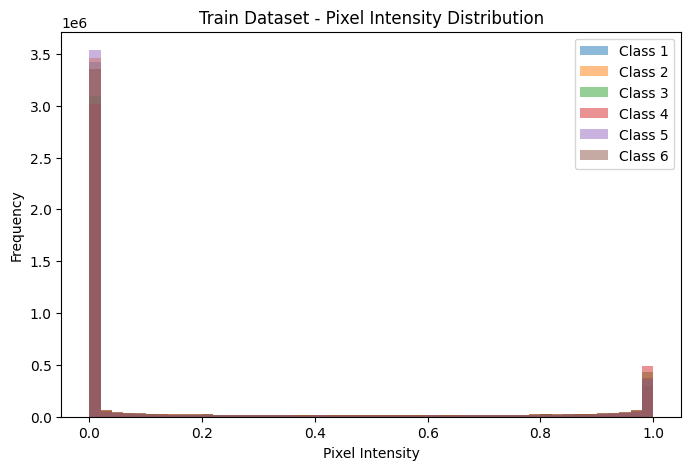

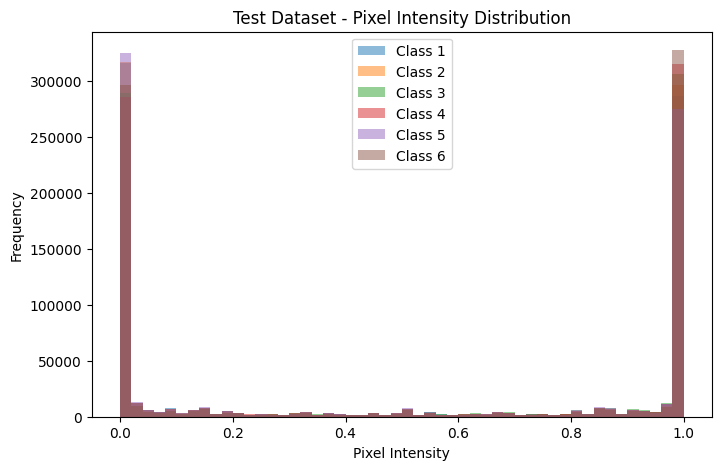

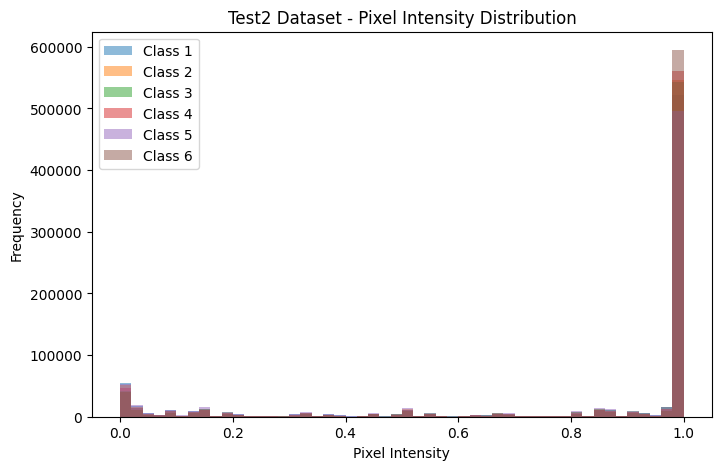

In [26]:
# Plot pixel intensity distribution
plot_pixel_intensity_distribution(train_images, "Train Dataset")
plot_pixel_intensity_distribution(test_images, "Test Dataset")
plot_pixel_intensity_distribution(test2_images, "Test2 Dataset")

### 3. Mean plots
Computes and displays the average of pixel intensities across all training and testing images.

Here we can see approximate symbols shape of each class of each dataset and also can that train dataset has black backgroung, test dataset has 50%/50% black/white background, and test2 dataset has white background.

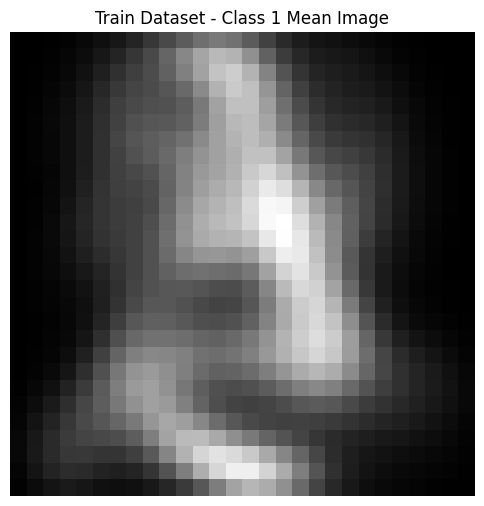

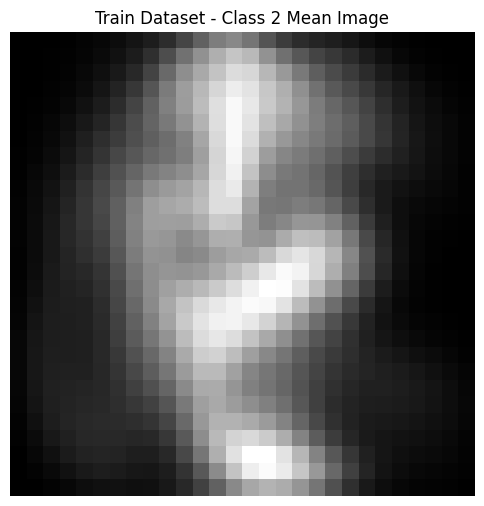

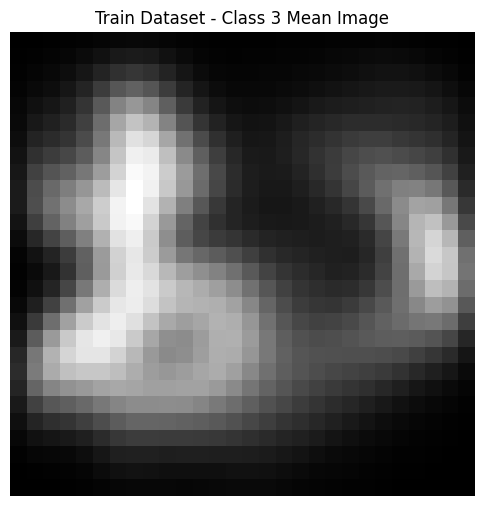

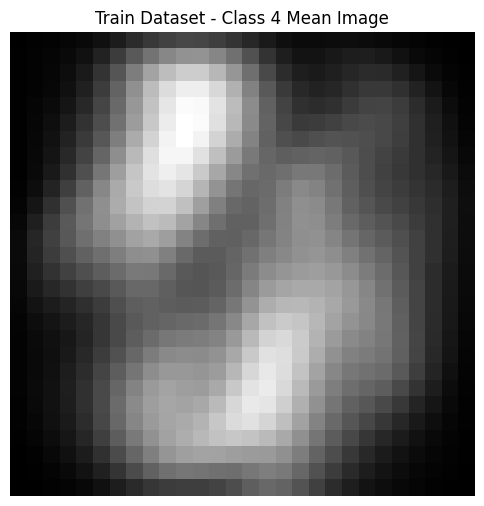

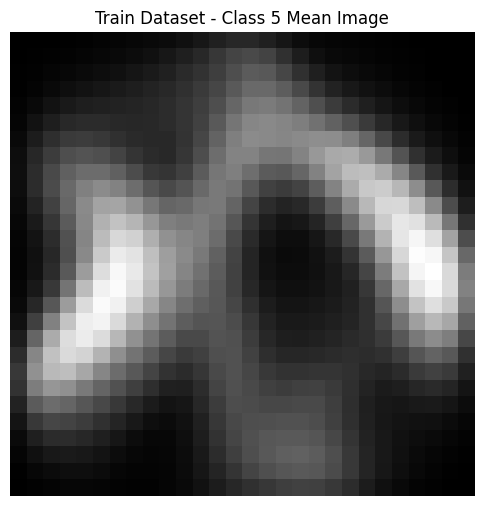

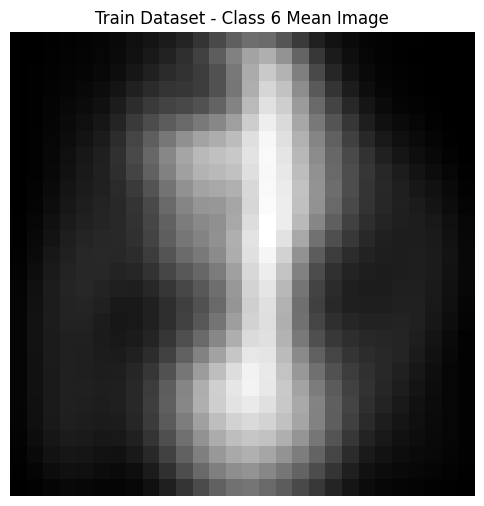

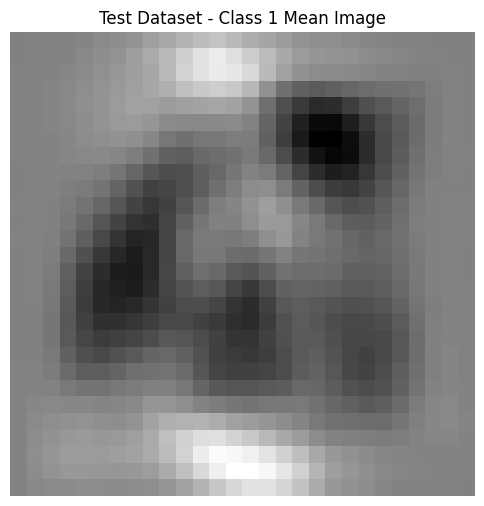

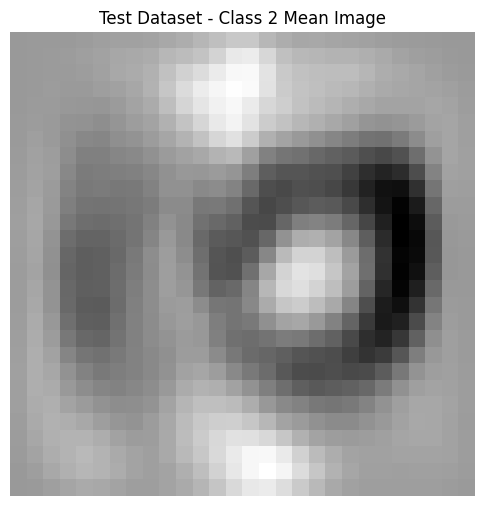

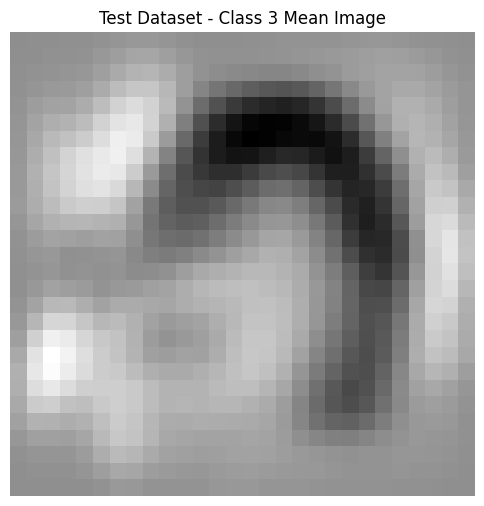

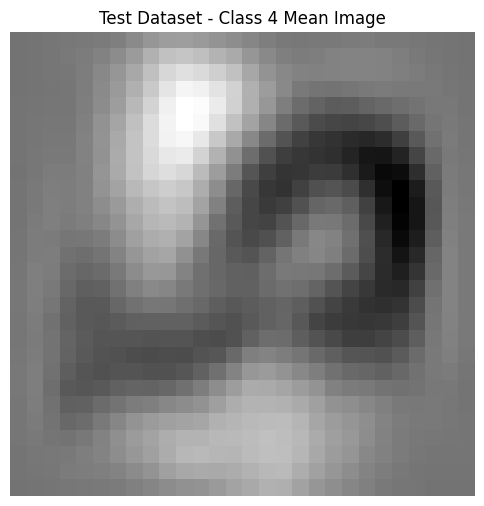

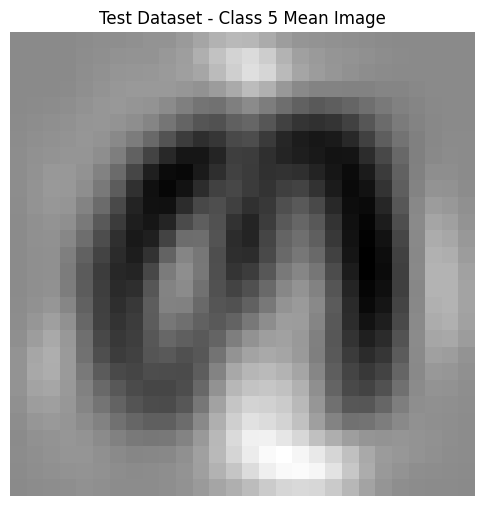

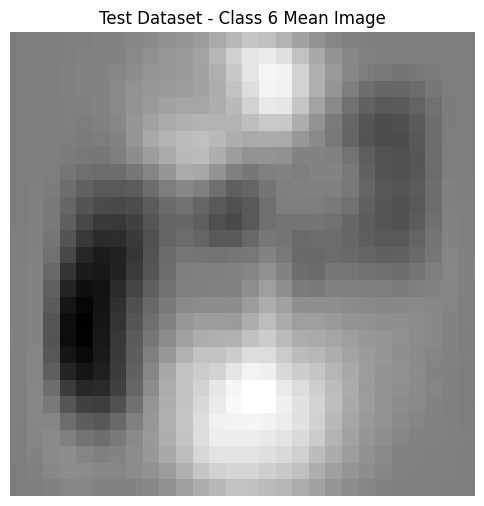

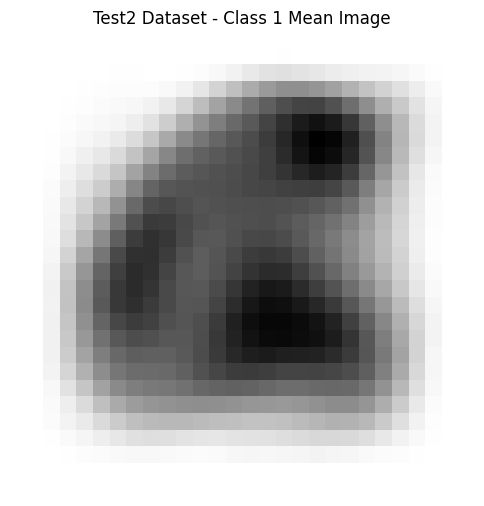

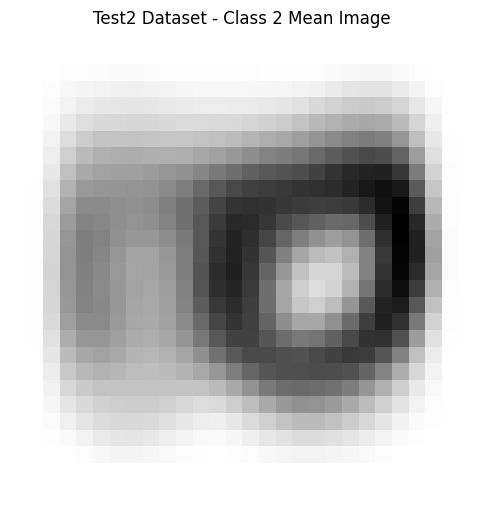

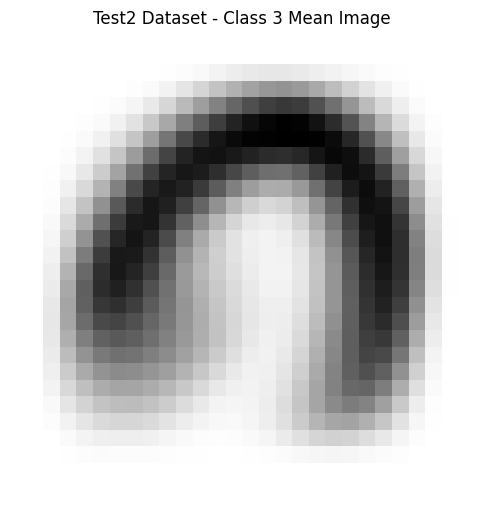

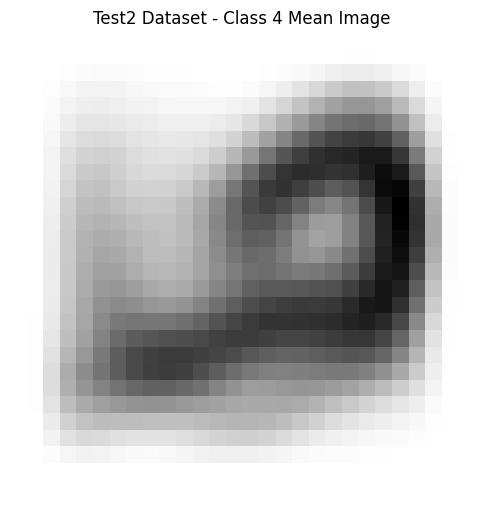

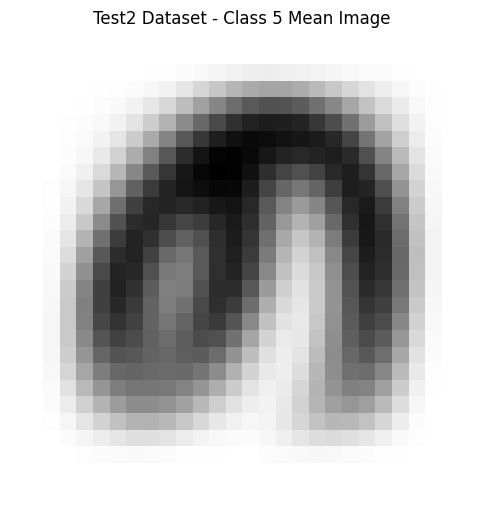

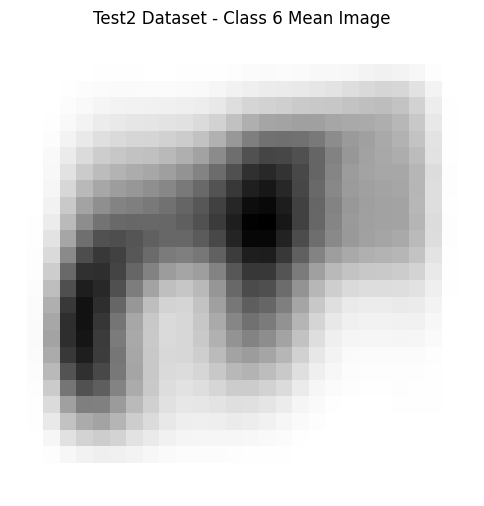

In [33]:
# Compute and plot mean and variance images for train and test datasets
train_mean_images, train_variance_images = compute_mean_variance(train_images)
plot_mean_variance(train_mean_images, train_variance_images, "Train Dataset")

test_mean_images, test_variance_images = compute_mean_variance(test_images)
plot_mean_variance(test_mean_images, test_variance_images, "Test Dataset")

test2_mean_images, test2_variance_images = compute_mean_variance(test2_images)
plot_mean_variance(test2_mean_images, test2_variance_images, "Test2 Dataset")



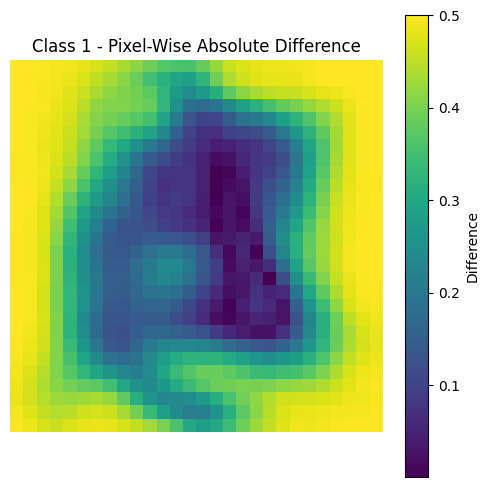

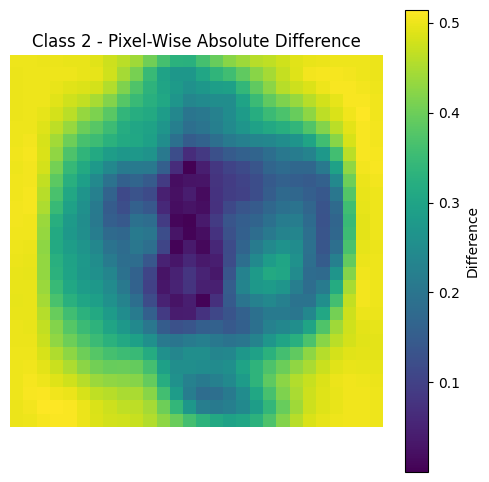

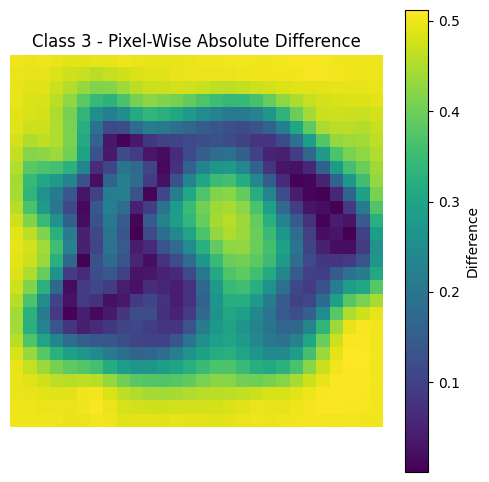

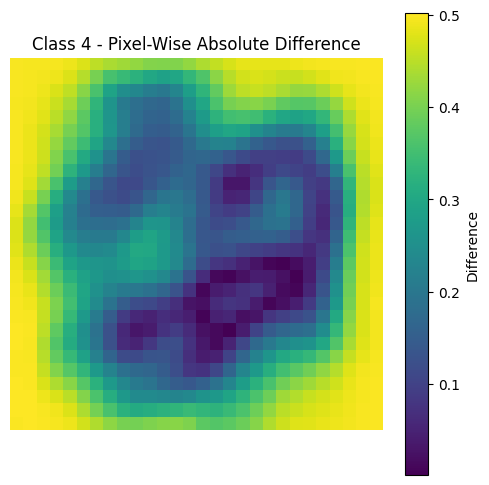

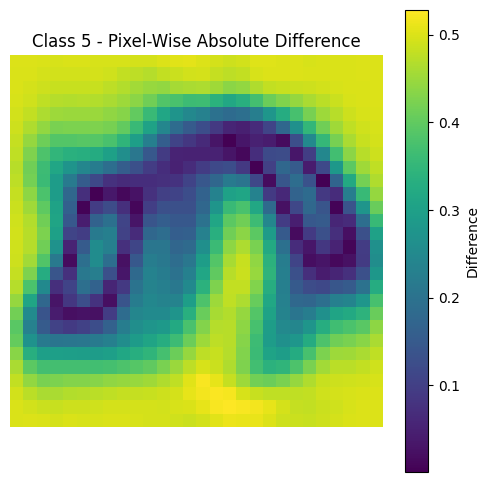

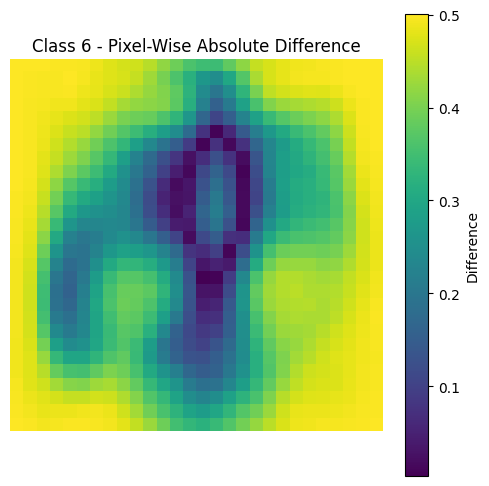

Pixel-wise comparison between test and test2 datasets


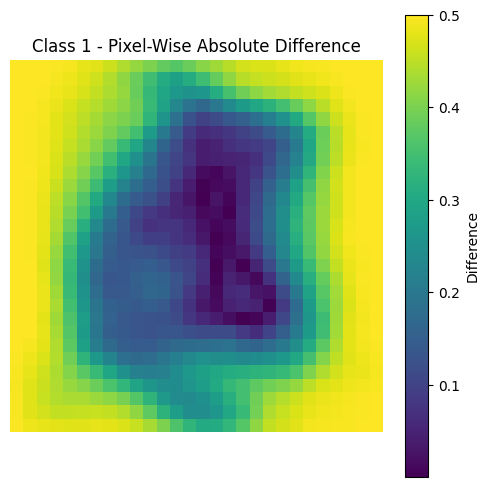

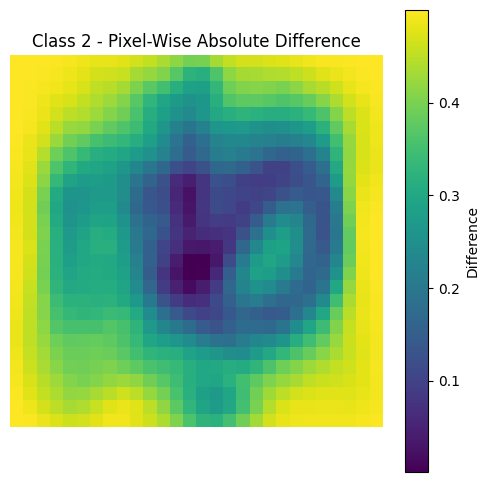

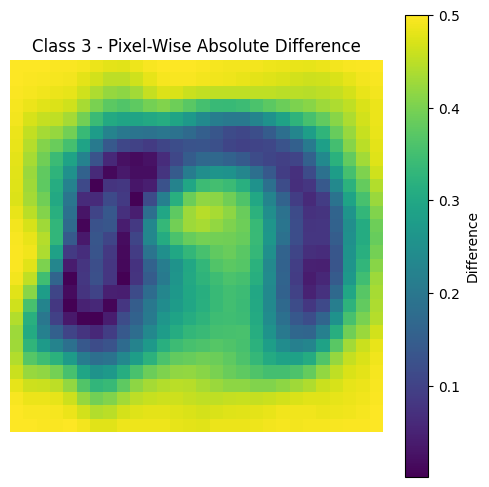

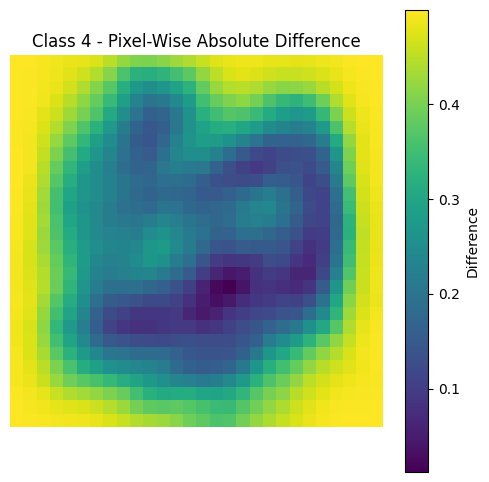

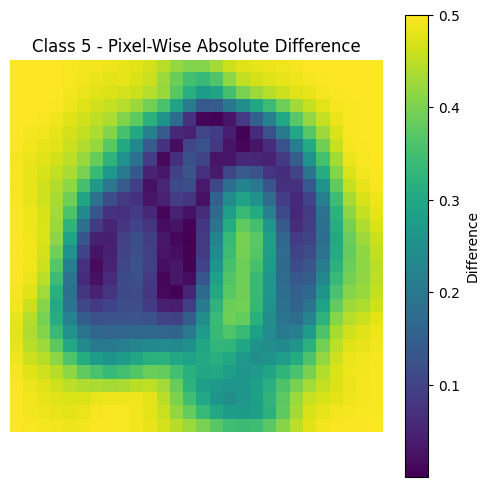

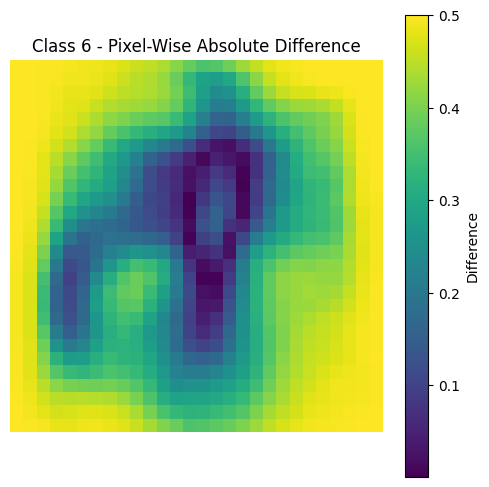

In [28]:
# Plot pixel-wise comparison between train and test datasets
plot_pixel_wise_difference(train_images, test_images)

# Plot pixel-wise comparison between test and test2 datasets
print("Pixel-wise comparison between test and test2 datasets")
plot_pixel_wise_difference(test_images, test2_images)